In [1]:
# !pip install scikit-learn
# !pip install imblearn

### Goal is to classify for income <=50k or >50K

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../../Datasets/adultcensusincome.csv', sep=',')
df.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
df.isin(['?']).sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [8]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [9]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [10]:
df = df.replace('?', np.nan)

In [11]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
df['income'].isin(['?']).sum()

0

Replace

In [13]:
income = df['income'].value_counts()
# income = df['income'].value_counts().reset_index()

income

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

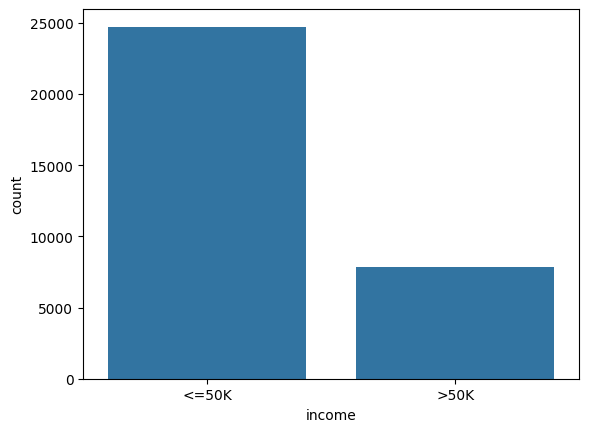

In [14]:
# sns.barplot(data=df, x='income', y='count')
# sns.barplot(data=income, x='income', y='count')
sns.barplot(income)

plt.show()

we have way more people with less than 50K in income

## Plot the histogram of the age data

<Axes: xlabel='age', ylabel='Count'>

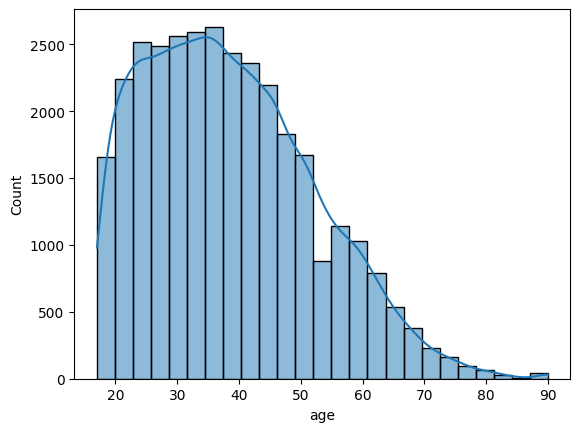

In [15]:
# sns.distplot(df['age'], bins=25, kde=True)
# sns.displot(df['age'], bins=25, kde=True)
sns.histplot(df['age'], bins=25, kde=True)

<Axes: xlabel='values', ylabel='index'>

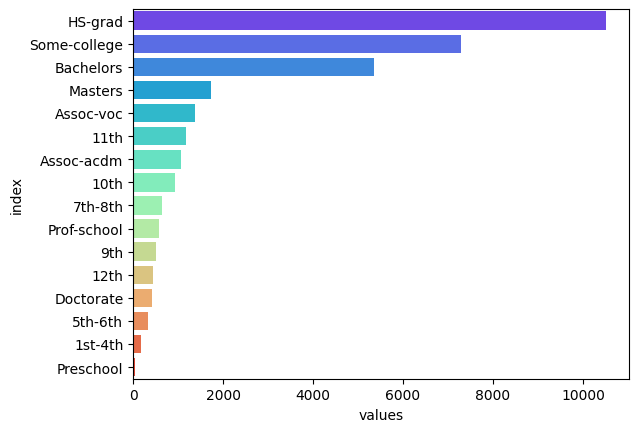

In [16]:
education  = df['education'].value_counts().reset_index()
education.columns = ['index', 'values']
sns.barplot(education, x='values', y='index', hue='index', palette='rainbow')

### Education Number

<Axes: xlabel='index', ylabel='values'>

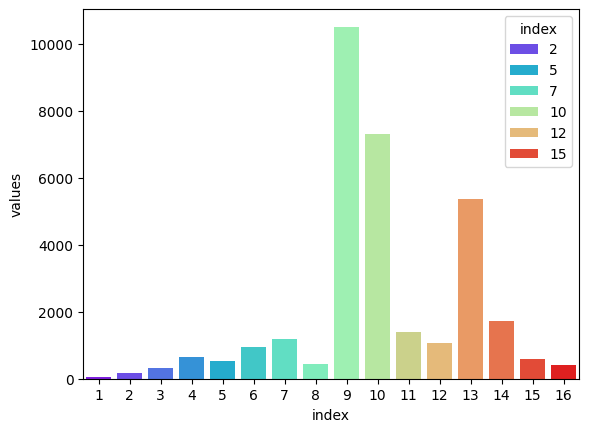

In [17]:
education  = df['education.num'].value_counts().reset_index()
education.columns = ['index', 'values']
sns.barplot(education, x='index', y='values', hue='index', palette='rainbow')

## 3.5 Create Pie Chart for Marital Status

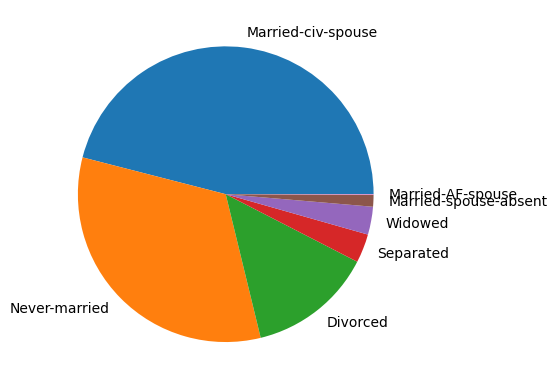

In [18]:
marital_status = df['marital.status'].value_counts()

plt.pie(marital_status.values, labels=marital_status.index)
plt.show()

### 3.6 Barplot for Sex

<Axes: xlabel='index', ylabel='values'>

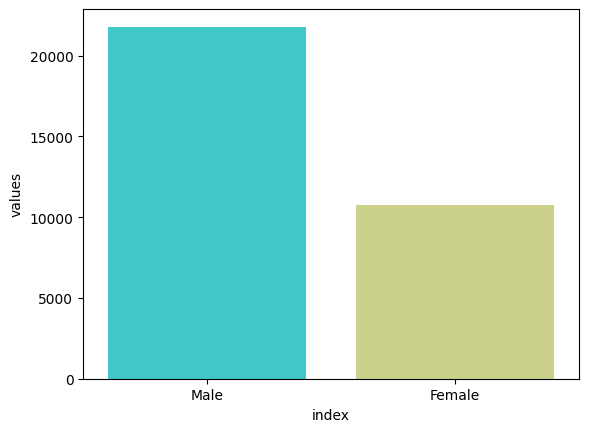

In [19]:
sex  = df['sex'].value_counts().reset_index()
sex.columns = ['index', 'values']
sns.barplot(sex, x='index', y='values', hue='index', palette='rainbow')

Data is biased to Male. We need to consider this for our model

### 3.7 Barplot for Hours per week

In [20]:
df['hours.per.week'].value_counts()

hours.per.week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64

<Axes: ylabel='hours.per.week'>

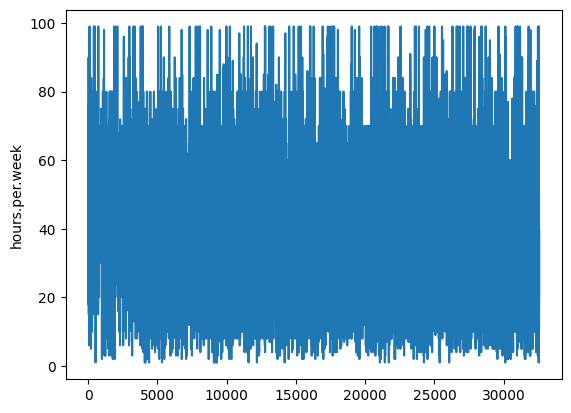

In [21]:
sns.lineplot(df['hours.per.week'])

<Axes: xlabel='hours.per.week', ylabel='Count'>

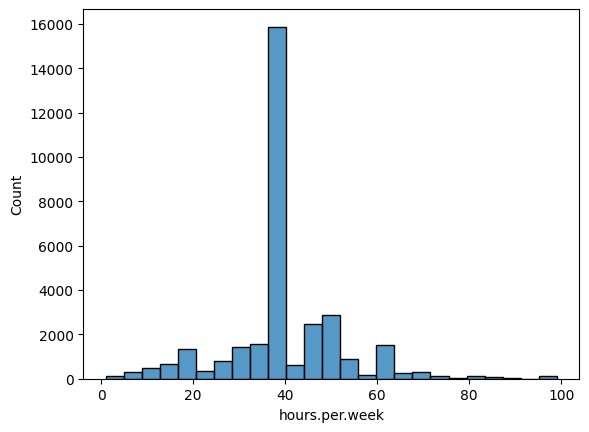

In [22]:
sns.histplot(df['hours.per.week'], bins=25)

### See the correlation of variables with Income

Convert income variable (categorical) into a numeric variable

In [23]:
encoder = LabelEncoder()
df['income_numeric'] = encoder.fit_transform(df['income'])

In [24]:
numeric_columns = df.select_dtypes(include=['number'])

corr_matrix = numeric_columns.corr()

<Axes: >

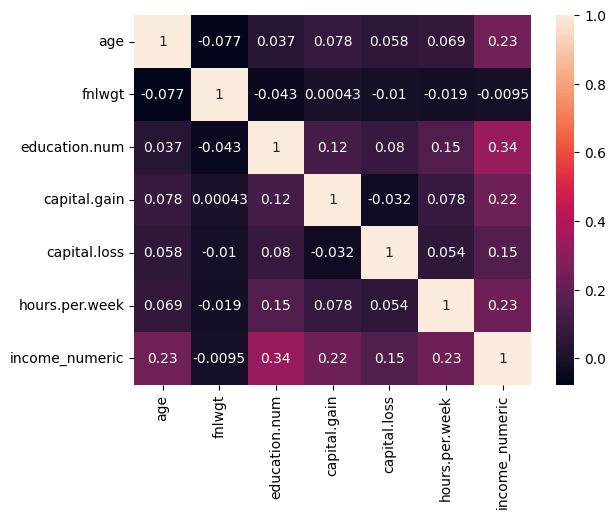

In [25]:
sns.heatmap(corr_matrix, annot=True)

# Perform bivariate

## 4.1 Create countplot of income accross columns age, education, marital status, race, sex

<Axes: xlabel='age', ylabel='count'>

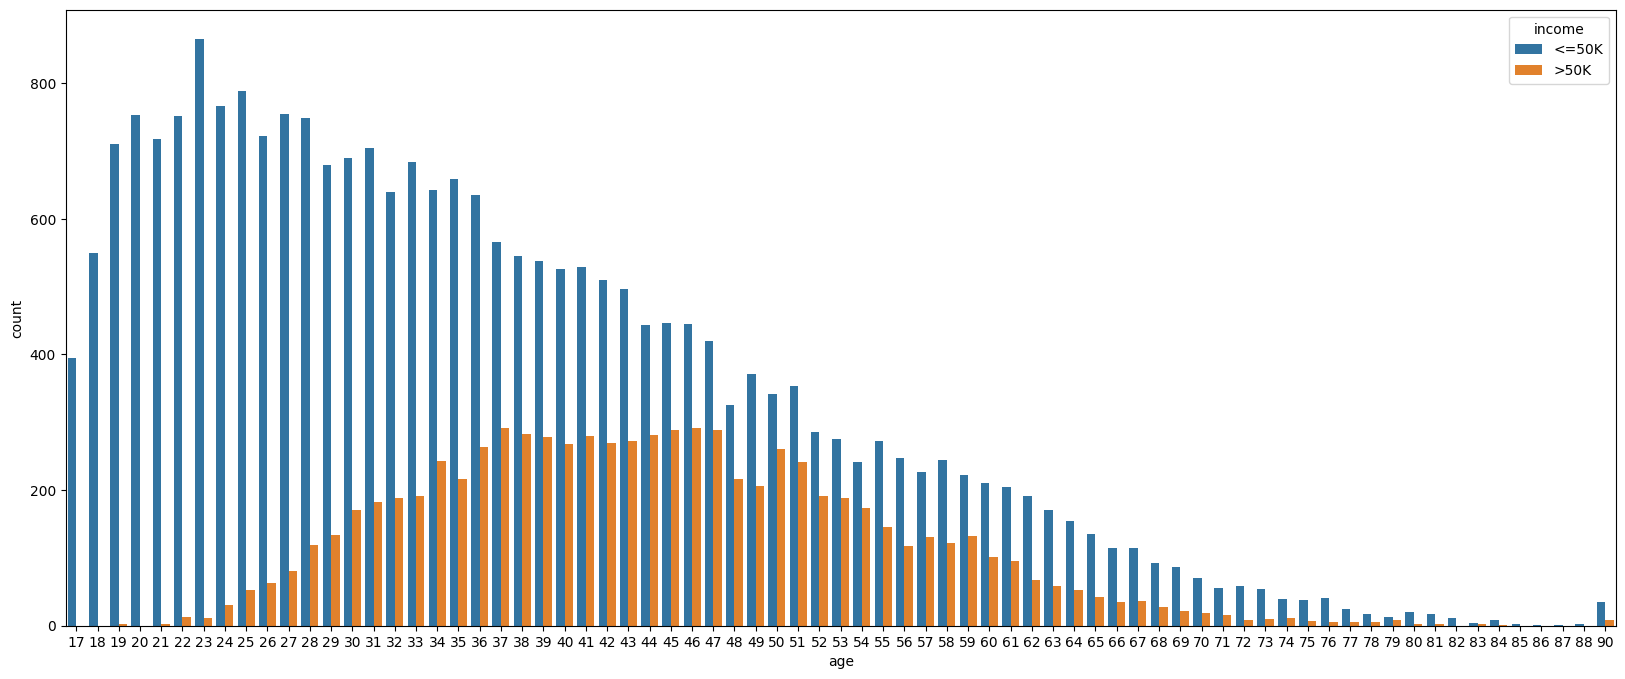

In [26]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='age', hue=df['income'])

<Axes: xlabel='education', ylabel='count'>

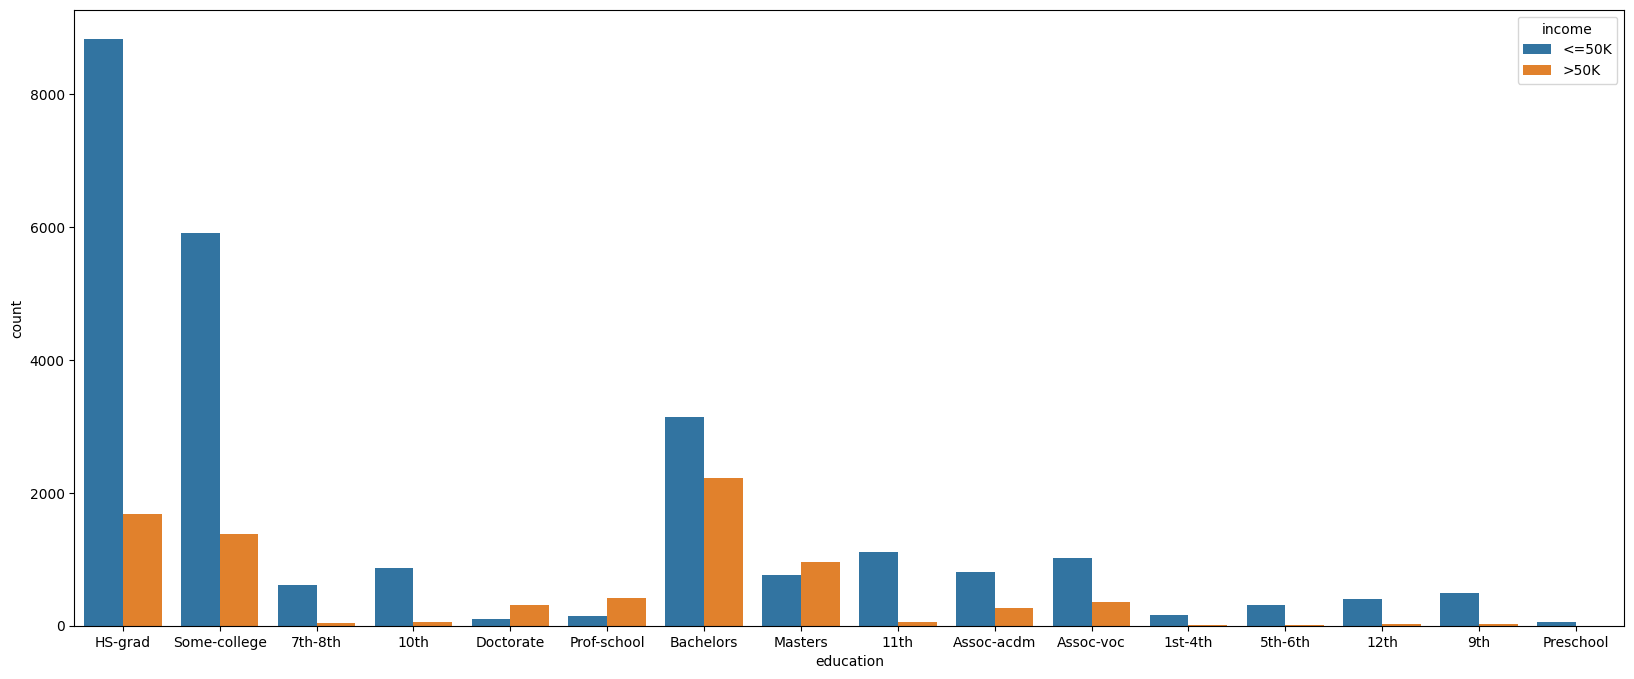

In [27]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='education', hue=df['income'])

<Axes: xlabel='marital.status', ylabel='count'>

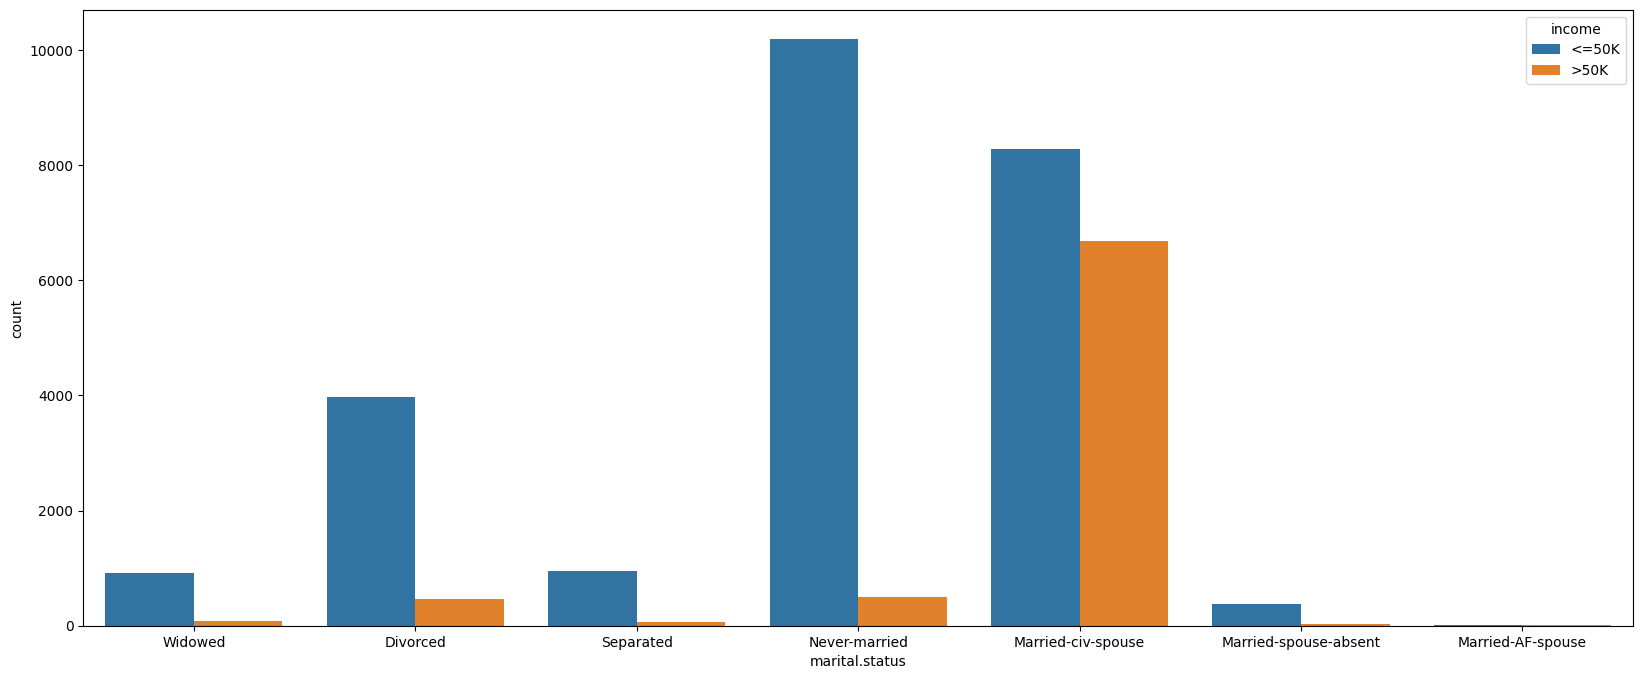

In [28]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='marital.status', hue=df['income'])

<Axes: xlabel='race', ylabel='count'>

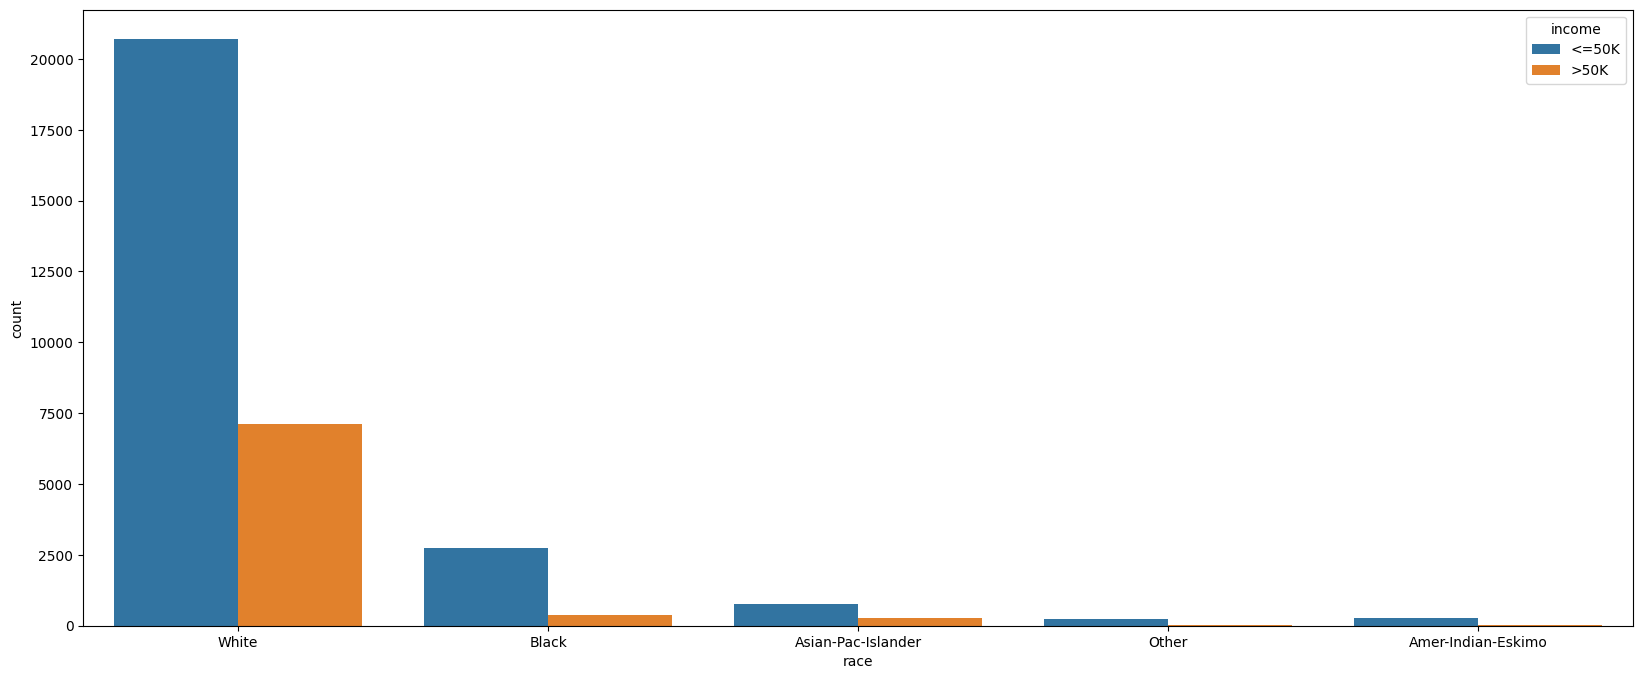

In [29]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='race', hue=df['income'])

Data is very biased for White people

<Axes: xlabel='sex', ylabel='count'>

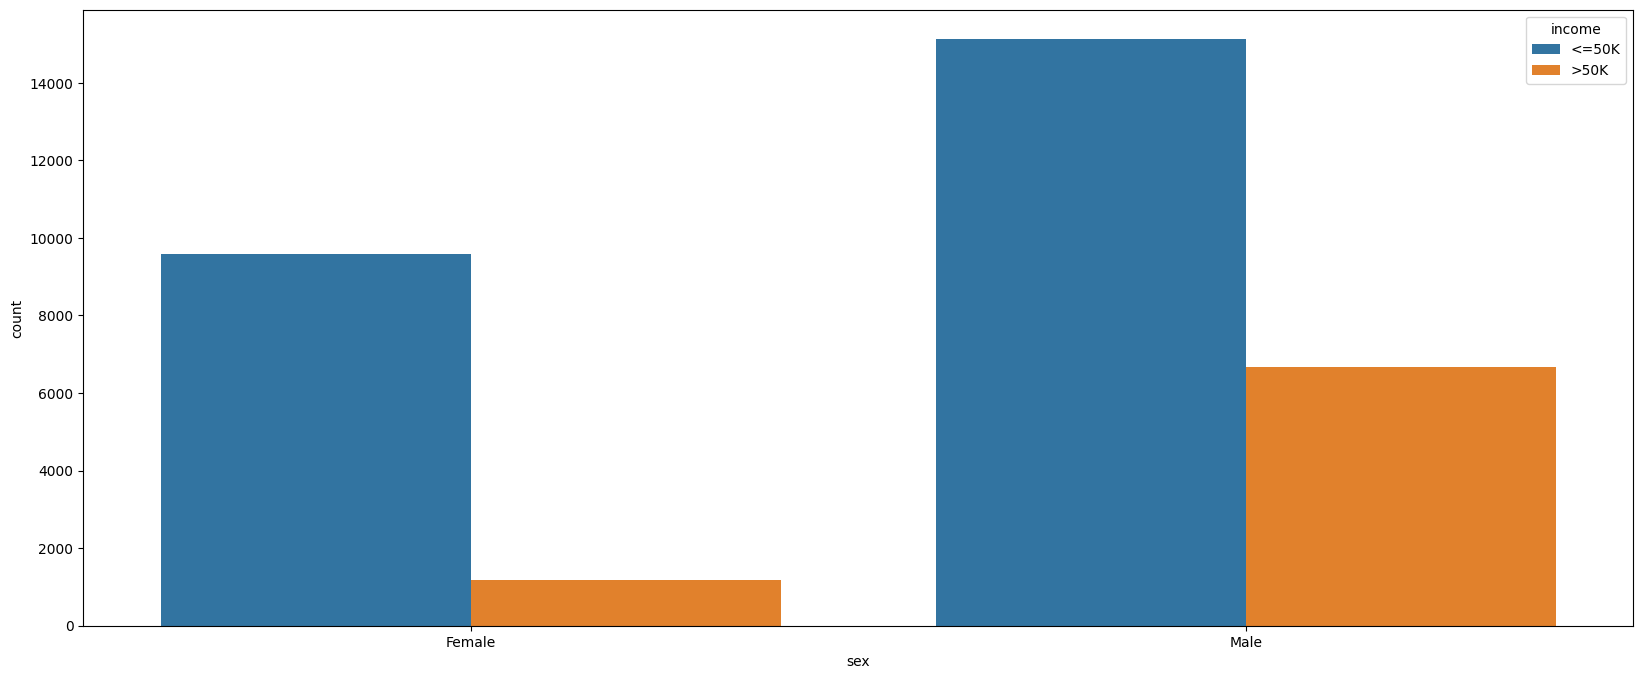

In [30]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='sex', hue=df['income'])

# 5 Prepare data for modeling

## 5.1 Label encode all the categorical columns

Fix missing values

In [31]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
income_numeric       0
dtype: int64

In [32]:
df['workclass'].fillna(df['workclass'].mode().iloc[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode().iloc[0], inplace=True)
df['native.country'].fillna(df['native.country'].mode().iloc[0], inplace=True)

# df['workclass'].fillna(df['workclass'].mode(), inplace=True)
# df['workclass'].fillna(df['workclass'].mode(), inplace=True)

/var/folders/cc/_kcvjw313pl6kbf8c3bdtnyc0000gn/T/ipykernel_9600/406597747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode().iloc[0], inplace=True)
/var/folders/cc/_kcvjw313pl6kbf8c3bdtnyc0000gn/T/ipykernel_9600/406597747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [33]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
income_numeric    0
dtype: int64

## 5.1 Label encode all the categorical columns to convert all into numerical variables

In [34]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_numeric
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0
...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0
32557,27,257302,12,0,0,38,0
32558,40,154374,9,0,0,40,1
32559,58,151910,9,0,0,40,0


In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'income_numeric'],
      dtype='object')

In [36]:
del df['income_numeric']

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [38]:
# create the encoder for our categorical variables

encoder = LabelEncoder()

for col in df.columns:
    if(df[col].dtypes== 'object'):
        df[col] = encoder.fit_transform(df[col])

In [39]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0


## 5.2 Prepra independent and dependent variables

In [40]:
X = df.drop('income', axis=1)
y = df['income']

In [78]:
feature_names = list(X.columns)
feature_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country']

## 5.3 Perform feature scaling using StandardScaler ind fix the imbalance in the dataset using SMOTE or RandomOverSampler

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# for col in df.columns:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

In [43]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3.769612,-0.085296,-1.067997,0.181332,-0.420060,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.26137
1,3.183112,-0.085296,-0.539169,0.181332,-0.420060,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.26137
2,2.010110,-0.085296,-0.035220,1.214869,-0.031360,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.26137
3,1.130359,-0.085296,-0.468215,-1.368974,-2.363558,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137
4,0.177296,-0.085296,0.709482,1.214869,-0.031360,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.26137


In [44]:
y.value_counts(normalize=True)

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64

Data is very unbalanced for the majority class(>50K)

Let's fix that

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ros = RandomOverSampler(random_state=42)
ros.fit(X,y)

RandomOverSampler(random_state=42)

Do the actual resampling...

In [47]:
X_resampled, y_resampled = ros.fit_resample(X,y)

In [48]:
y_resampled.value_counts(normalize=True)

income
0    0.5
1    0.5
Name: proportion, dtype: float64

In [49]:
y_resampled.value_counts()

income
0    24720
1    24720
Name: count, dtype: int64

## 5.4 Perform a tran test split in the ratio 80:20 and random state 42

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split (X_resampled, y_resampled, test_size=0.2, random_state=42)

In [52]:
X_train.shape

(39552, 14)

In [53]:
y_test.shape

(9888,)

# 6. Perform Classification Modeling

## 6.1 Train logistic regression model, KNN classifier model, SVM classifier, naive bayes classifier, decision tree classifier and random forest classifier

Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logistic_reg  = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [56]:
preds_logistic_reg = logistic_reg.predict(X_test)

KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
preds_knn = knn.predict(X_test)

In [76]:
print(knn)

KNeighborsClassifier()


SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [62]:
preds_svc = svc.predict(X_test)

Naive Bayes

We should use Multinomial instead of Gaussian

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [65]:
preds_nb = nb.predict(X_test)

Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier


In [84]:
# tree = DecisionTreeClassifier(random_state=42)
tree = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)   


tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [85]:
preds_tree = tree.predict(X_test)

Visualize the decision tree model

In [86]:
from sklearn.tree import export_text

r = export_text(tree, feature_names=feature_names)
print(r)

|--- marital.status <= -0.07
|   |--- marital.status <= -1.40
|   |   |--- capital.gain <= 0.49
|   |   |   |--- class: 0
|   |   |--- capital.gain >  0.49
|   |   |   |--- class: 1
|   |--- marital.status >  -1.40
|   |   |--- education.num <= -0.23
|   |   |   |--- class: 1
|   |   |--- education.num >  -0.23
|   |   |   |--- class: 1
|--- marital.status >  -0.07
|   |--- capital.gain <= 0.85
|   |   |--- education.num <= 0.94
|   |   |   |--- class: 0
|   |   |--- education.num >  0.94
|   |   |   |--- class: 0
|   |--- capital.gain >  0.85
|   |   |--- class: 1



Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
preds_rf = rf.predict(X_test)

## 6.2 Perform model evaluation on Accuracy and F1

In [72]:
from sklearn.metrics import accuracy_score, f1_score

In [73]:
def print_metrics(title,model_preds):
    print(title)
    print('Accuracy: ', accuracy_score(y_test, model_preds))
    print('F1 score: ', f1_score(y_test, model_preds))

In [87]:
print_metrics('Log Reg', preds_logistic_reg)
print_metrics('KNN', preds_knn)
print_metrics('SVM Classifier', preds_svc)
print_metrics('Gaussian NB', preds_nb)
print_metrics('Decision Tree', preds_tree)
print_metrics('Random Forest', preds_rf)

Log Reg
Accuracy:  0.76709142394822
F1 score:  0.7661691542288557
KNN
Accuracy:  0.8358616504854369
F1 score:  0.8457370972341032
SVM Classifier
Accuracy:  0.8262540453074434
F1 score:  0.8352512466436517
Gaussian NB
Accuracy:  0.6894215210355987
F1 score:  0.5900413829929249
Decision Tree
Accuracy:  0.7832726537216829
F1 score:  0.8049513060890143
Random Forest
Accuracy:  0.9324433656957929
F1 score:  0.9352336629823541


Extra: Evaluate Decision Tree Model

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test contains the true labels and y_predict contains the predicted labels
accuracy = accuracy_score(y_test, preds_tree)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, preds_tree)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, preds_tree, zero_division=1)
print("Classification Report:")
print(report)

Accuracy: 0.7832726537216829
Confusion Matrix:
[[3323 1632]
 [ 511 4422]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      4955
           1       0.73      0.90      0.80      4933

    accuracy                           0.78      9888
   macro avg       0.80      0.78      0.78      9888
weighted avg       0.80      0.78      0.78      9888

